# Spider-Gender

## Fasi:
1. Estrazione dei dataset
2. Combinazione dei dataset

# Estrazione dei dataset
In questa fase vengono create le directory contenenti i dataset estratti.  
É necessario che nella cartella contenente i file si trovino i **.zip** dei 2 dataset.

In [69]:
#Inserire in una cartella di lavoro i file zip dei dataset
#Creazione delle directory ed estrazione dei dataset
import os
import utils as u

path=r"C:\Users\vince\Desktop\Progetto FVAB"
os.chdir(path)
cwd = os.getcwd()

#Crea directory per estrarre i dataset solo una volta all'inizio
u.makedir('celeba')
u.makedir('utkface')

#Estrae i due dataset solo una volta all'inizio
u.unzip('celeba-dataset.zip','celeba')
u.unzip('utkface-new.zip','utkface')

# Combinazione dei dataset
In questa fase sono combinati i due dataset e viene creato un indice che tiene traccia dei nuovi nomi 

| Old_Name    | New_Name   |
| :---: | :---: |
|   000001.jpg    | 000001_1.jpg     |
|  1_0_0_20161219140627985.jpg.chip.jpg  | 000002_0.jpg       |

Il nuovo nome è composto da:
* Parte sinistra un intero che incrementa di 1
* Parte destra dopo l'underscore che indica la label 
 0. Donna 
 1. Uomo

In [73]:
import utils as u
import os
path=r"C:\Users\vince\Desktop\Progetto FVAB"
os.chdir(path)

u.makedir('merged_dataset')
os.chdir('merged_dataset')
u.makedir('images')


path_images_celeba=r"C:\Users\vince\Desktop\Progetto FVAB\celeba\img_align_celeba\img_align_celeba"
path_images_celeba2=r"C:\Users\vince\Desktop\Progetto FVAB\celeba\img_align_celeba\img_align_celeba2"

path_images_utkface=r"C:\Users\vince\Desktop\Progetto FVAB\utkface\UTKFace"
path_images_utkface2=r"C:\Users\vince\Desktop\Progetto FVAB\\utkface\UTKFace2"

path_celeba_csv=r"C:\Users\vince\Desktop\Progetto FVAB\celeba\list_attr_celeba.csv"
path_celeba_csv2=r"C:\Users\vince\Desktop\Progetto FVAB\celeba\list_attr_celeba2.csv"

dest_path=r"C:\Users\vince\Desktop\Progetto FVAB\merged_dataset\images"
dest_path_oldnew_csv=r"C:\Users\vince\Desktop\Progetto FVAB\merged_dataset"

u.merge_datasets(path_images_celeba,
                 path_images_utkface,
                 path_celeba_csv,
                 dest_path,
                 dest_path_oldnew_csv)
#u.merge_utk_only(path_images_utkface2,dest_path_oldnew_csv,dest_path)

# Estrazione dei Landmarks
In questa fase utilizzo l'algoritmo fornito per ottenere i landmarks sul volto  

<img style="float:left;" src="web.PNG">

In [74]:
%%capture
os.chdir(path)
import calcolo_ragnatela as spider
spider.extract_landmarks_4circles_4sectors(r"C:\Users\vince\Desktop\Progetto FVAB\shape_predictor_68_face_landmarks.dat",r'C:\Users\vince\Desktop\Progetto FVAB\merged_dataset\images')

# Classificatore
Usiamo le SVM  
Seed 42


In [2]:
#Import svm model
from sklearn import svm
from sklearn import metrics
from numpy import loadtxt
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from joblib import dump, load
from sklearn.metrics import mean_absolute_error
from numpy import savetxt


#Provare con 1000 immagini e cronometrare

import pandas as pd
from sklearn.model_selection import train_test_split

labels= loadtxt('UTK_Matrix.csv',delimiter=',', usecols=(0,))
data= loadtxt('UTK_Matrix.csv', delimiter=',',usecols=range(1,64))

print(data.shape)


X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, shuffle=False, random_state=42)

svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

#dump(svclassifier, 'SVM_CelebA.joblib') 


y_pred = svclassifier.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred,target_names=['female','male']))

print(mean_absolute_error(y_test, y_pred))

savetxt('y_test_UTK.csv',y_test,fmt='%i',delimiter=',')
savetxt('y_pred_UTK.csv',y_pred,fmt='%i',delimiter=',')

#Senza stratificazione

(23707, 63)
[[1565 1198]
 [1155 3195]]
              precision    recall  f1-score   support

      female       0.58      0.57      0.57      2763
       ma le       0.73      0.73      0.73      4350

    accuracy                           0.67      7113
   macro avg       0.65      0.65      0.65      7113
weighted avg       0.67      0.67      0.67      7113

0.33080275551806554


In [1]:
import utils as u

#CelebA
#u.extract_male('CelebA_Matrix.csv','CelebA_Male.csv')
#u.extract_female('CelebA_Matrix.csv','CelebA_Female.csv')
u.balance_datasets_random_50_50('CelebA_Male.csv','CelebA_Female.csv','a.csv')

#UTK
#u.extract_male('UTK_Matrix.csv','UTK_Male.csv')
#u.extract_female('UTK_Matrix.csv','UTK_Female.csv')
#u.balance_datasets_random_50_50('UTK_Male.csv','UTK_Female.csv','b.csv')

#UTK+CelebA
#u.extract_male('CelebA+UTK_Matrix.csv','CelebA+UTK_Male.csv')
#u.extract_female('CelebA+UTK_Matrix.csv','CelebA+UTK_Female.csv')
#u.balance_datasets_random_50_50('UTK+CelebA_Male.csv','UTK+CelebA_Female.csv','c.csv')

more females
30672
(171926, 65)


In [15]:
#Import svm model
from sklearn import svm
from sklearn import metrics
from numpy import loadtxt
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from joblib import dump, load
from sklearn.metrics import mean_absolute_error
from numpy import savetxt
import numpy as np
import pandas as pd





import pandas as pd
from sklearn.model_selection import train_test_split 

labels= loadtxt('UTK_Even_Gender.csv',delimiter=',', usecols=(0,))
data= loadtxt('UTK_Even_Gender.csv', delimiter=',',usecols=range(1,64))

print(data.shape)


X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, shuffle=True,stratify=labels, random_state=42)

#Numero di uni nelle label del test set (e zeri in basso)
print(np.count_nonzero(y_test == 1)) 
print(np.count_nonzero(y_test == 0))

#Numero di uni nelle label del training set (e zeri in basso)
print(np.count_nonzero(y_train == 1))
print(np.count_nonzero(y_train == 0))


svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

dump(svclassifier, 'SVM_UTK_Balanced_42.joblib') 


y_pred = svclassifier.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred,target_names=['female','male']))

print(mean_absolute_error(y_test, y_pred))

savetxt('y_test_UTK_Balanced_42.csv',y_test,fmt='%i',delimiter=',')
savetxt('y_pred_UTK_Balanced_42.csv',y_pred,fmt='%i',delimiter=',')  
   
#Con stratificazione




(22806, 63)
3421
3421
7982
7982
[[2385 1036]
 [1113 2308]]
              precision    recall  f1-score   support

      female       0.68      0.70      0.69      3421
        male       0.69      0.67      0.68      3421

    accuracy                           0.69      6842
   macro avg       0.69      0.69      0.69      6842
weighted avg       0.69      0.69      0.69      6842

0.314089447529962


# Esperimento 2
1. Utilizzare classificatore addestrato su **CelebA** con test set **UTKFace** intero <br/><br/>

2. Utilizzare classificatore addestrato su **CelebA** con test set **UTKFace** utilizzato in precedenza<br/><br/>

3. Utilizzare classificatore addestrato su **UTKFace** con test set **CelebA** intero  <br/><br/>

4. Utilizzare classificatore addestrato su **UTKFace** con test set **CelebA** utilizzato in precedenza <br/><br/>


In [1]:
from sklearn import svm
from sklearn import metrics
from numpy import loadtxt
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from joblib import dump, load
from sklearn.metrics import mean_absolute_error
from numpy import savetxt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 

loaded_model = load('SVM_UTK_Balanced_42.joblib')


labels= loadtxt('CelebA_Even_Gender.csv',delimiter=',', usecols=(0,))
data= loadtxt('CelebA_Even_Gender.csv', delimiter=',',usecols=range(1,64))

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, shuffle=True,stratify=labels, random_state=42)



y_pred = loaded_model.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred,target_names=['female','male']))

print(mean_absolute_error(y_test, y_pred))

savetxt('y_test_2nd_experiment_4UTK-CelebA42.csv',y_test,fmt='%i',delimiter=',')
savetxt('y_pred_2nd_experiment_4UTK-CelebA42.csv',y_pred,fmt='%i',delimiter=',')  

[[17111  8678]
 [ 7773 18016]]
              precision    recall  f1-score   support

      female       0.69      0.66      0.68     25789
        male       0.67      0.70      0.69     25789

    accuracy                           0.68     51578
   macro avg       0.68      0.68      0.68     51578
weighted avg       0.68      0.68      0.68     51578

0.3189538175190973


# Integrazione
Utilizziamo una rete neurale e ripetiamo i 2 esperimenti

## Primo esperimento



Train on 136799 samples
Epoch 1/20
136799/136799 [==============================] - 27s 201us/sample - loss: 0.5188 - accuracy: 0.7406 - mae: 0.5101
Epoch 2/20
136799/136799 [==============================] - 27s 200us/sample - loss: 0.4856 - accuracy: 0.7647 - mae: 0.5131
Epoch 3/20
136799/136799 [==============================] - 27s 199us/sample - loss: 0.4725 - accuracy: 0.7728 - mae: 0.5102
Epoch 4/20
136799/136799 [==============================] - 27s 200us/sample - loss: 0.4626 - accuracy: 0.7806 - mae: 0.5083
Epoch 5/20
136799/136799 [==============================] - 27s 198us/sample - loss: 0.4555 - accuracy: 0.7840 - mae: 0.5068
Epoch 6/20
136799/136799 [==============================] - 28s 203us/sample - loss: 0.4484 - accuracy: 0.7882 - mae: 0.5052
Epoch 7/20
136799/136799 [==============================] - 28s 201us/sample - loss: 0.4419 - accuracy: 0.7930 - mae: 0.5033
Epoch 8/20
136799/136799 [==============================] - 27s 200us/sample - loss: 0.4358 - accurac

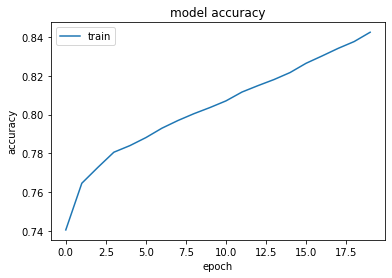

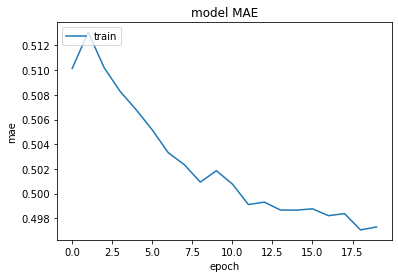

[0 1 1 ... 1 0 1]
INFO:tensorflow:Assets written to: Neural_network_UTK+CelebA_Even_Gender_Balanced\assets
[[24207  5108]
 [ 7859 21455]]
              precision    recall  f1-score   support

      female       0.75      0.83      0.79     29315
        male       0.81      0.73      0.77     29314

    accuracy                           0.78     58629
   macro avg       0.78      0.78      0.78     58629
weighted avg       0.78      0.78      0.78     58629

0.2211704105476812


In [7]:
from sklearn import metrics
from numpy import loadtxt
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from joblib import dump, load
from sklearn.metrics import mean_absolute_error
from numpy import savetxt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 
import tensorflow as tf
import matplotlib.pyplot as plt


name='UTK+CelebA_Even_Gender'

labels= loadtxt(name+'.csv',delimiter=',', usecols=(0,))
data= loadtxt(name+'.csv', delimiter=',',usecols=range(1,64))

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, shuffle=True,stratify=labels, random_state=42)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(63,)))
model.add(tf.keras.layers.Dense(768, activation='relu'))
model.add(tf.keras.layers.Dense(768, activation='relu'))
model.add(tf.keras.layers.Dense(2, activation='sigmoid'))


opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(optimizer = opt,
         loss = 'sparse_categorical_crossentropy',
         metrics = ['accuracy','mae'])
history=model.fit(X_train, y_train, epochs = 20)

print(history.history.keys())


# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig(name+' accuracy.png')
plt.show()

# summarize history for loss
plt.plot(history.history['mae'])
plt.title('model MAE')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig(name+' loss.png')
plt.show()


y_pred=model.predict_classes(X_test)
print(y_pred)
savetxt('Neural_network_'+name+' Predictions',y_test,fmt='%i',delimiter=',')



model.save('Neural_network_'+name+'_Balanced')
model.save_weights(name+'_weights.h5')


print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred,target_names=['female','male']))

print(mean_absolute_error(y_test, y_pred))





## Secondo Esperimento

In [14]:
from sklearn import metrics
from numpy import loadtxt
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from joblib import dump, load
from sklearn.metrics import mean_absolute_error
from numpy import savetxt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 
import tensorflow as tf
from tensorflow.keras.models import load_model

dataset='CelebA_Even_Gender'
name_model='Neural_network_UTK_Even_Gender_Balanced'

y_test= loadtxt(dataset+'.csv',delimiter=',', usecols=(0,))
X_test= loadtxt(dataset+'.csv', delimiter=',',usecols=range(1,64))



#X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, shuffle=True,stratify=labels, random_state=42)

model = load_model(name_model)

y_pred=model.predict_classes(X_test)
print(y_pred)
savetxt('Exp2_Neural_network_'+name_model+' Model on '+dataset+' dataset Predictions',y_test,fmt='%i',delimiter=',')


model.save('Exp2_Neural_network_'+name_model+' Model on '+dataset+' dataset_Balanced')
model.save_weights('Exp2_'+name_model+' Model on '+dataset+' dataset_weights.h5')

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred,target_names=['female','male']))

print(mean_absolute_error(y_test, y_pred))


[0 0 1 ... 1 1 1]
INFO:tensorflow:Assets written to: Exp2_Neural_network_Neural_network_UTK_Even_Gender_Balanced Model on CelebA_Even_Gender dataset_Balanced\assets
[[56835 29128]
 [17029 68934]]
              precision    recall  f1-score   support

      female       0.77      0.66      0.71     85963
        male       0.70      0.80      0.75     85963

    accuracy                           0.73    171926
   macro avg       0.74      0.73      0.73    171926
weighted avg       0.74      0.73      0.73    171926

0.26847015576468947
